<a href="https://colab.research.google.com/github/Shashankabasani/nic-ant-colony-optimization/blob/main/Enhancing_Cancer_Prediction_Investigating_ACO_Based_Feature_Selection_with_Logistic_Regression%2C_XGBoost%2C_and_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1512
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


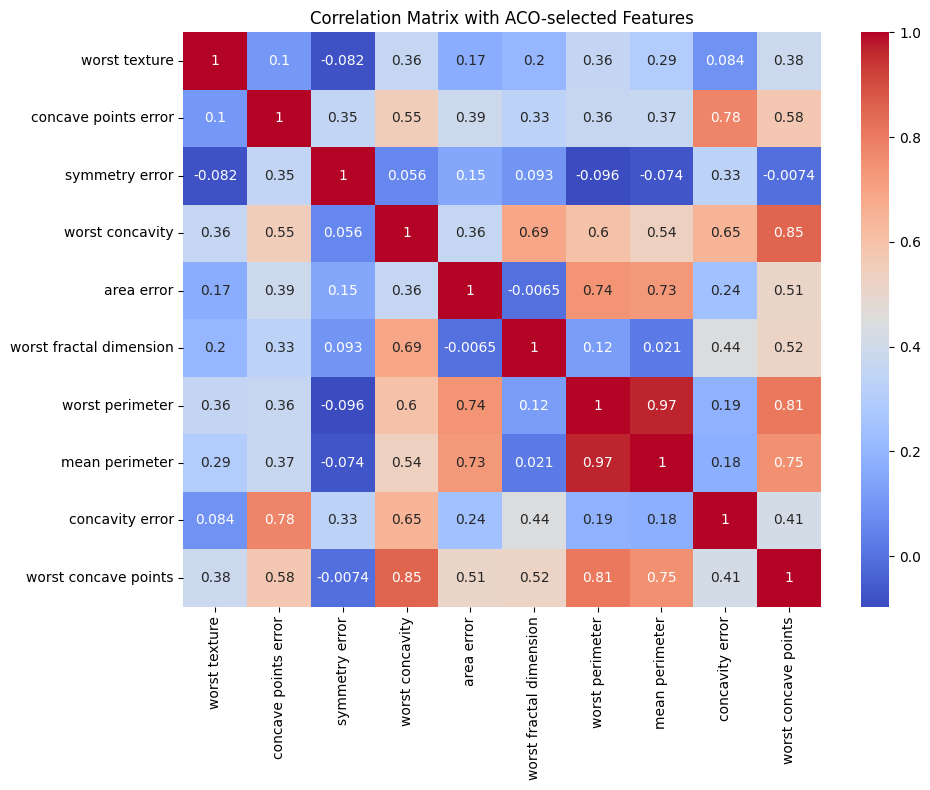

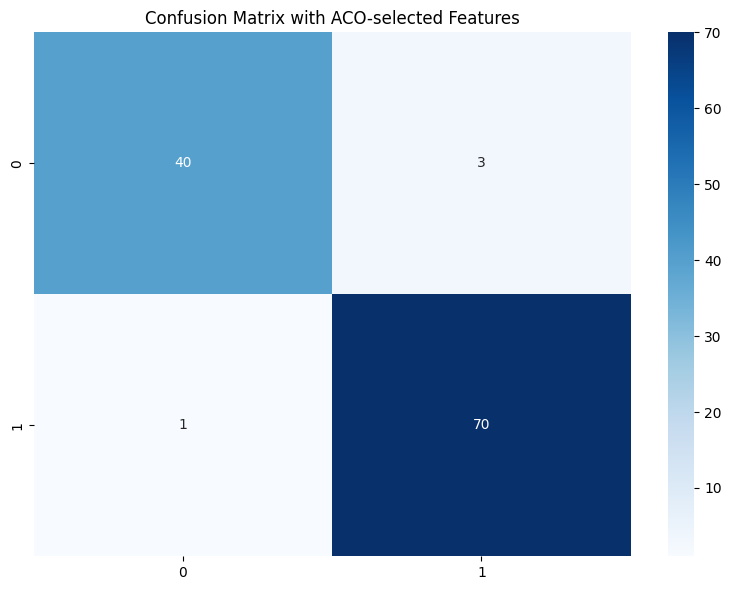

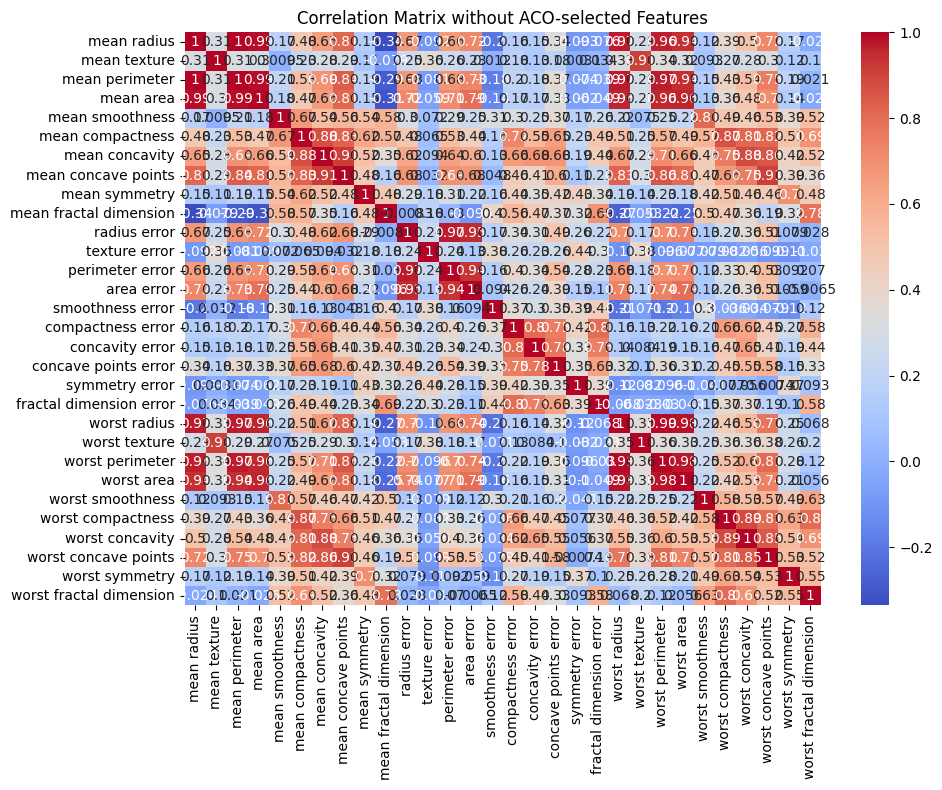

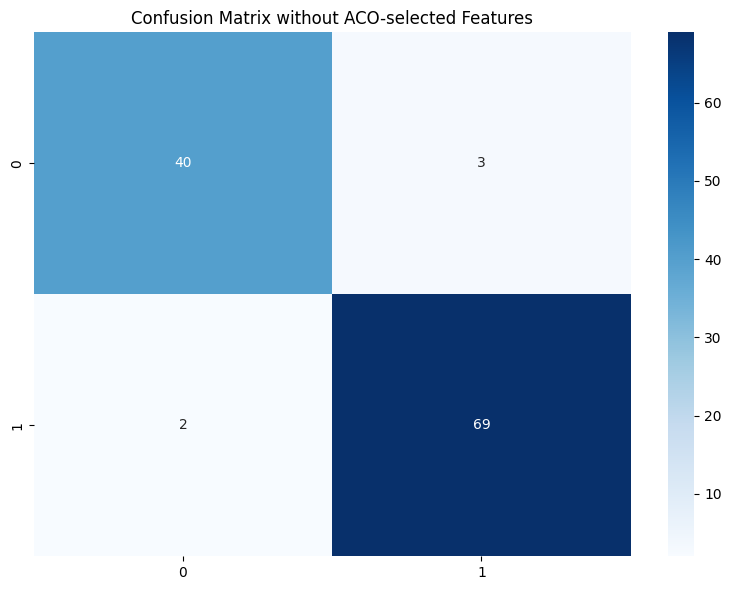

Results with ACO-selected Features:

LightGBM
------------------------------
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
F1-Score: 0.951048951048951

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Confusion Matrix:
[[39  4]
 [ 3 68]]

Logistic Regression
------------------------------
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
F1-Score: 0.9722222222222222

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg

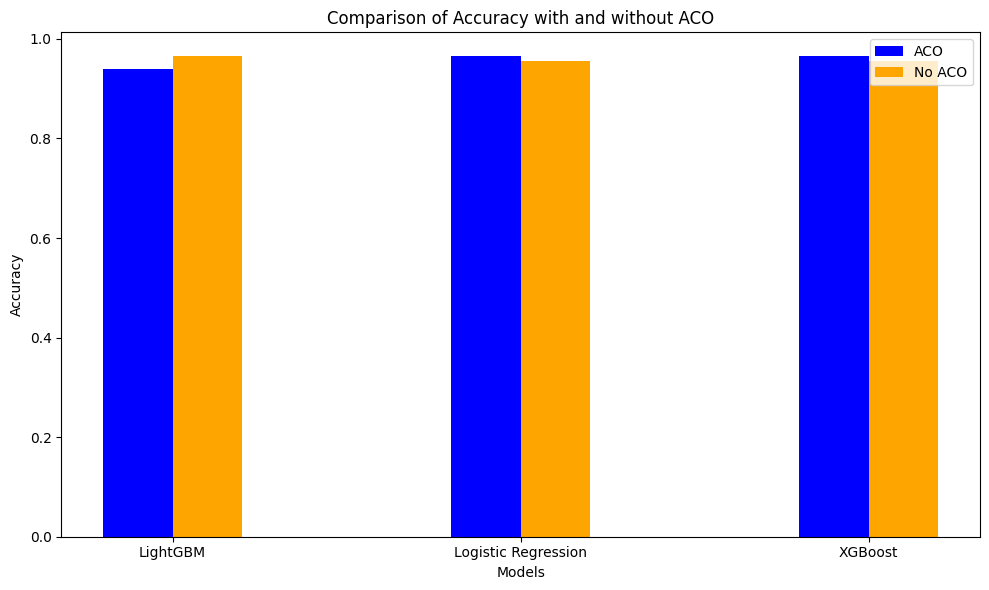

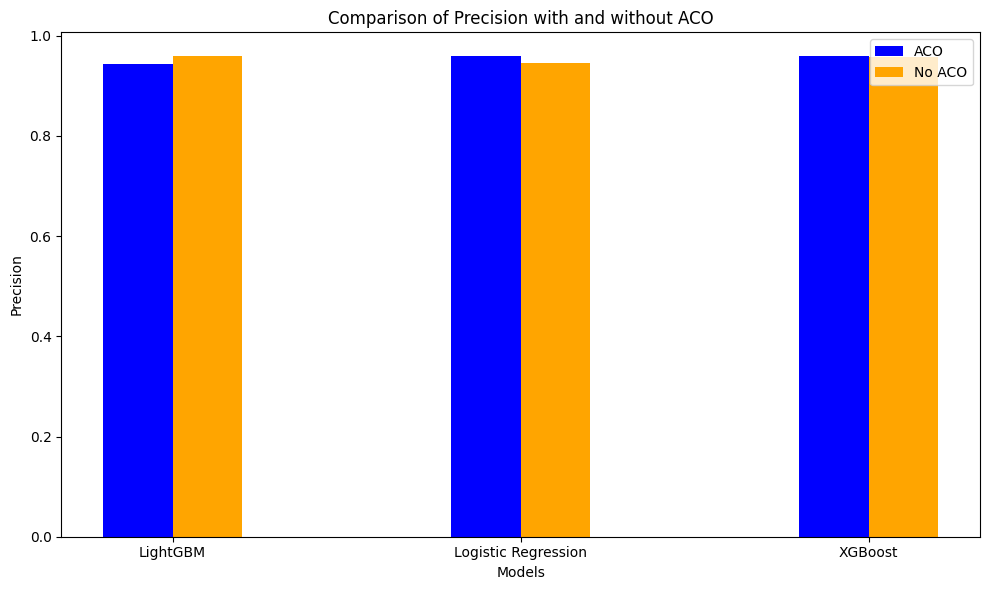

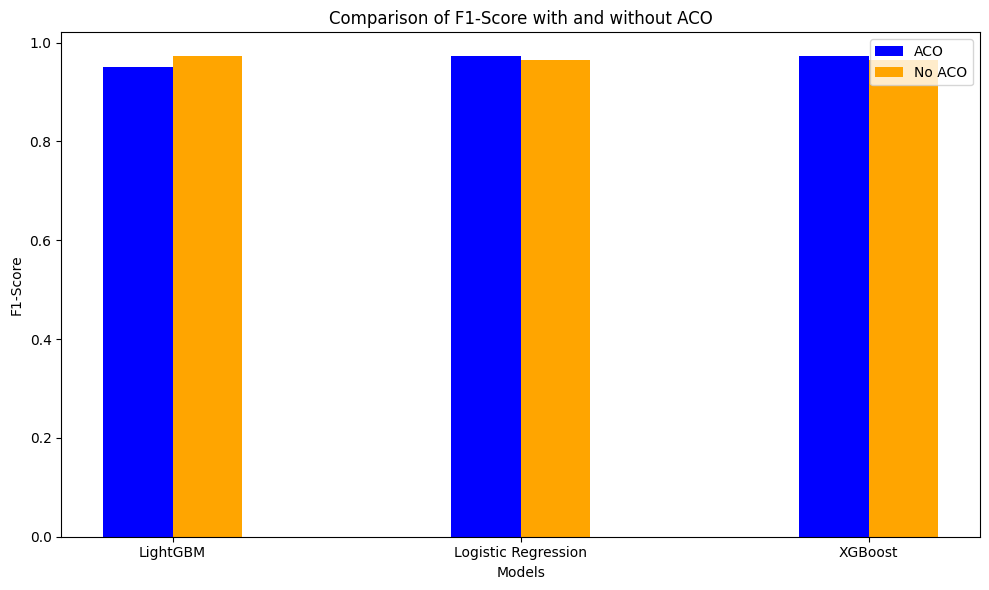

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, f1_score, \
                            classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.exceptions import ConvergenceWarning
import warnings

# Load breast cancer dataset
data = load_breast_cancer()

# Create DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the dataset into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Define XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Replace Random Forest with LightGBM
models = {
    "LightGBM": lgb_classifier,
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "XGBoost": xgb_classifier
}

# Perform feature selection using Ant Colony Optimization (ACO)
# Example:
# selected_features_aco = perform_feature_selection_with_aco(X_train, y_train)
# For now, let's randomly select features for demonstration
selected_features_aco = np.random.choice(X_train.columns, size=10, replace=False)

# Fit models and evaluate performance with and without ACO-selected features
results_aco = {}
results_no_aco = {}

for model_name, model in models.items():
    # Model with ACO-selected features
    X_train_selected_aco = X_train.loc[:, selected_features_aco]
    X_test_selected_aco = X_test.loc[:, selected_features_aco]

    model.fit(X_train_selected_aco, y_train)
    y_pred_aco = model.predict(X_test_selected_aco)

    accuracy_aco = accuracy_score(y_test, y_pred_aco)
    precision_aco = precision_score(y_test, y_pred_aco)
    f1_aco = f1_score(y_test, y_pred_aco)
    report_aco = classification_report(y_test, y_pred_aco)
    matrix_aco = confusion_matrix(y_test, y_pred_aco)

    results_aco[model_name] = {
        "Accuracy": accuracy_aco,
        "Precision": precision_aco,
        "F1-Score": f1_aco,
        "Classification Report": report_aco,
        "Confusion Matrix": matrix_aco
    }

# Model without ACO-selected features
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_no_aco = model.predict(X_test)

    accuracy_no_aco = accuracy_score(y_test, y_pred_no_aco)
    precision_no_aco = precision_score(y_test, y_pred_no_aco)
    f1_no_aco = f1_score(y_test, y_pred_no_aco)
    report_no_aco = classification_report(y_test, y_pred_no_aco)
    matrix_no_aco = confusion_matrix(y_test, y_pred_no_aco)

    results_no_aco[model_name] = {
        "Accuracy": accuracy_no_aco,
        "Precision": precision_no_aco,
        "F1-Score": f1_no_aco,
        "Classification Report": report_no_aco,
        "Confusion Matrix": matrix_no_aco
    }

# Extract metrics for plotting
metrics_df_aco = pd.DataFrame(results_aco).T
metrics_df_no_aco = pd.DataFrame(results_no_aco).T

# Plotting grouped bar charts for each model and each metric with ACO
models_aco = metrics_df_aco.index
metrics = ["Accuracy", "Precision", "F1-Score"]
n_models_aco = len(models_aco)
bar_width = 0.2
index = np.arange(n_models_aco)

# Correlation Matrix with ACO
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_train.loc[:, selected_features_aco].corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix with ACO-selected Features")
plt.tight_layout()
plt.savefig("correlation_matrix_with_ACO.png")
plt.show()

# Confusion Matrix with ACO
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_aco, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix with ACO-selected Features")
plt.tight_layout()
plt.savefig("confusion_matrix_with_ACO.png")
plt.show()

# Correlation Matrix without ACO
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix without ACO-selected Features")
plt.tight_layout()
plt.savefig("correlation_matrix_without_ACO.png")
plt.show()

# Confusion Matrix without ACO
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix_no_aco, annot=True, fmt="d", cmap="Blues", ax=ax)
ax.set_title("Confusion Matrix without ACO-selected Features")
plt.tight_layout()
plt.savefig("confusion_matrix_without_ACO.png")
plt.show()

# Print Results with ACO
print("Results with ACO-selected Features:")
for model_name, metrics in results_aco.items():
    print("\n" + "="*30)
    print(model_name)
    print("-"*30)
    for metric_name, value in metrics.items():
        if metric_name not in ["Classification Report", "Confusion Matrix"]:
            print(f"{metric_name}: {value}")

    print("\nClassification Report:")
    print(metrics["Classification Report"])

    print("\nConfusion Matrix:")
    print(metrics["Confusion Matrix"])

# Print Results without ACO
print("\n\nResults without ACO-selected Features:")
for model_name, metrics in results_no_aco.items():
    print("\n" + "="*30)
    print(model_name)
    print("-"*30)
    for metric_name, value in metrics.items():
        if metric_name not in ["Classification Report", "Confusion Matrix"]:
            print(f"{metric_name}: {value}")

    print("\nClassification Report:")
    print(metrics["Classification Report"])

    print("\nConfusion Matrix:")
    print(metrics["Confusion Matrix"])

# Plotting individual graphs for each metric with and without ACO
for metric in metrics:
    if metric not in ["Classification Report", "Confusion Matrix"]:  # Exclude classification report
        fig, ax = plt.subplots(figsize=(10, 6))

        # ACO metrics
        ax.bar(index - bar_width/2, metrics_df_aco[metric], bar_width, label='ACO', color='blue')

        # No ACO metrics
        ax.bar(index + bar_width/2, metrics_df_no_aco[metric], bar_width, label='No ACO', color='orange')

        ax.set_xlabel('Models')
        ax.set_ylabel(metric)
        ax.set_title(f'Comparison of {metric} with and without ACO')
        ax.set_xticks(index)
        ax.set_xticklabels(models_aco)
        ax.legend()

        plt.tight_layout()
        plt.savefig(f"comparison_{metric}_with_and_without_ACO.png")
        plt.show()
